### Homework 1

##### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

##### Из перечисленных временными рядами являются следующие: 

а) зависимость цены на недвижимость в конкретном регионе от времени. Здесь все понятно, явно указано, что цены зависят от времени.

в) количество отказов компьютера. Количество отказов компьютера может считаться только за какой-то промежуток времени (день, месяц, год), поэтому это тоже временной ряд.

г) число обращений в поликлинику по району. Здесь аналогично с компьютерами. Число обращений в поликлинику тоже считается за какой-то промежуток времени.

е) координаты фигуры нарушителя в файле видеофиксации охранной системы. Этот ряд является временным, поскольку при видеофиксации также указывается время, значит мы получаем инвормацию о координатах преступника в определенный момент времени и получаем ряд координаты - время.

на счет б и д сомневаюсь. Не являются ли все примеры временными рядами? 

#### 2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [4]:
COVID_.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
12564,12565,04/06/2020,Wyoming,US,2020-04-06 23:28:35,210.0,0.0,0.0
12565,12566,04/06/2020,Xinjiang,Mainland China,2020-04-06 23:28:35,76.0,3.0,73.0
12566,12567,04/06/2020,Yukon,Canada,2020-04-06 23:28:35,6.0,0.0,0.0
12567,12568,04/06/2020,Yunnan,Mainland China,2020-04-06 23:28:35,184.0,2.0,172.0
12568,12569,04/06/2020,Zhejiang,Mainland China,2020-04-06 23:28:35,1264.0,1.0,1230.0


In [5]:
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']).dt.date

In [6]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

In [7]:
COVID.head(30)

Confirmed  Deaths  Recovered
Data       Country/Region                              
2020-01-22 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              2.0     0.0        0.0
           US                    1.0     0.0        0.0
2020-01-23 Australia             0.0     0.0        0.0
           Brazil                0.0     0.0        0.0
           Colombia              0.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 1.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      639.0    18.0       30.0
           Malaysia              0.0     0.0        0.0
           Mexico                0.0     0.0        0.0
           Philippines           0.0     0.0        0.0
           Singapore             1.0     0.0        0.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              3.0     0.0        0.0
           US                    1.0     0.0        0.0
           Vietnam               2.0     0.0        0.0
2020-01-24 France                2.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      916.0    26.0       36.0
           Singapore             3.0     0.0        0.0

Я выберу Италию

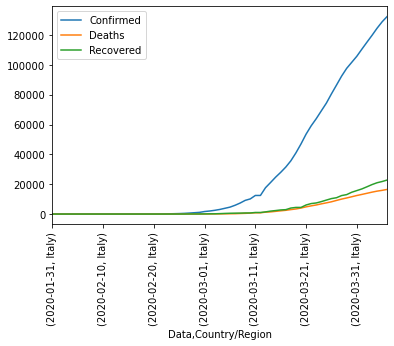

In [11]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Italy', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

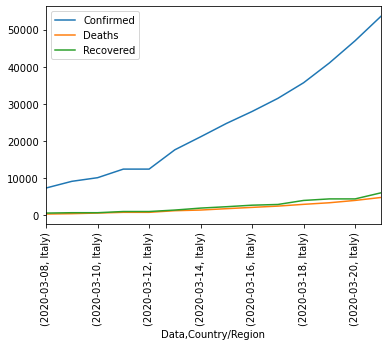

In [22]:
COVID.loc[((COVID.index.get_level_values( 'Country/Region')=='Italy') & (COVID.index.get_level_values( 'Data') > pd.to_datetime('2020-03-07'))& (COVID.index.get_level_values( 'Data') < pd.to_datetime('2020-03-22'))), ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

по графику можно видеть, что прирост количества заболеваний в Италии отмечается в начале марта. Есть какие то движения в подтвержденных случаях в середине марта и какие-то колебания в выздоровлениях в конце марта. Посмотрим на них по ближе.

In [24]:
COVID_.loc[( (COVID_[ 'Country/Region']=='Italy') & (COVID_['Data'] > pd.to_datetime('2020-03-07'))& (COVID_['Data'] < pd.to_datetime('2020-03-22'))), :].head(50)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Data
3993,3994,03/08/2020,NaN,Italy,2020-03-08T18:03:04,7375.0,366.0,622.0,2020-03-08
4248,4249,03/09/2020,NaN,Italy,2020-03-09T18:13:11,9172.0,463.0,724.0,2020-03-09
4514,4515,03/10/2020,NaN,Italy,2020-03-10T17:53:02,10149.0,631.0,724.0,2020-03-10
4720,4721,03/11/2020,NaN,Italy,2020-03-11T21:33:02,12462.0,827.0,1045.0,2020-03-11
4936,4937,03/12/2020,NaN,Italy,2020-03-11T21:33:02,12462.0,827.0,1045.0,2020-03-12
5215,5216,03/13/2020,NaN,Italy,2020-03-11T20:00:00,17660.0,1266.0,1439.0,2020-03-13
5384,5385,03/14/2020,NaN,Italy,2020-03-14T20:13:16,21157.0,1441.0,1966.0,2020-03-14
5633,5634,03/15/2020,NaN,Italy,2020-03-14T20:13:16,24747.0,1809.0,2335.0,2020-03-15
5891,5892,03/16/2020,NaN,Italy,2020-03-16T17:33:03,27980.0,2158.0,2749.0,2020-03-16
6163,6164,03/17/2020,NaN,Italy,2020-03-17T18:33:02,31506.0,2503.0,2941.0,2020-03-17


Взглянув на цифры можно сделать вывод, что скачки не значительные и и вызваны скорее всего отсутствием данных по зараженным от 12/03 и по выздоровевшим за 20/03. Причем по выздоровлениям можно отметить значительный скачок 18/03 и 21/03, датам обрамляющим интересующие нас колебания.

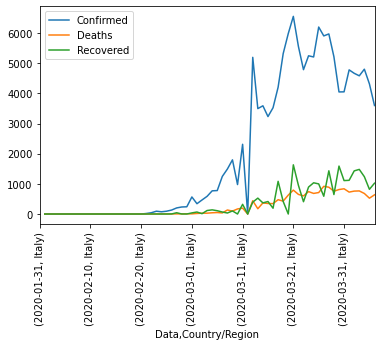

In [25]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Italy', ['Confirmed','Deaths','Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

График разностей показывает провал до нуля, как раз 12/03 когда новых данных не было по заболеваниям. И провал до нуля по выздоровлениям 20/03.

### Построение признаков

In [26]:
X1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Italy', ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0

In [27]:
X2 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Italy', ['Confirmed','Deaths','Recovered']].values

In [28]:
X1.shape

(67, 3)

In [29]:
X2.shape

(67, 3)

In [65]:
X3 = COVID.iloc[COVID.index.get_level_values( 'Country/Region')=='Italy'].index.get_level_values( 'Data')

In [66]:
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear

In [67]:
XX = np.concatenate([X1,X2], axis= 1)
XX = np.concatenate([XX,np.array(X3_1).reshape((67,1))], axis= 1)
XX = np.concatenate([XX,np.array(X3_2).reshape((67,1))], axis= 1)
XX.shape

(67, 8)

In [101]:
COVID_Data = pd.DataFrame(data= XX, index=pd.to_datetime(X3), columns=['Confirmed/day', 'Deaths/day', 'Recovered/day',
                                                       'Confirmed', 'Deaths', 'Recovered', 
                                                        'day_of_week', 'day_from_start'])

In [102]:
COVID_Data.head(10)

,Confirmed/day,Deaths/day,Recovered/day,Confirmed,Deaths,Recovered,day_of_week,day_from_start
Data,,,,,,,,
2020-01-31,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0
2020-02-01,0.0,0.0,0.0,2.0,0.0,0.0,5.0,1.0
2020-02-02,0.0,0.0,0.0,2.0,0.0,0.0,6.0,2.0
2020-02-03,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
2020-02-04,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0
2020-02-05,0.0,0.0,0.0,2.0,0.0,0.0,2.0,5.0
2020-02-06,0.0,0.0,0.0,2.0,0.0,0.0,3.0,6.0
2020-02-07,1.0,0.0,0.0,3.0,0.0,0.0,4.0,7.0
2020-02-08,0.0,0.0,0.0,3.0,0.0,0.0,5.0,8.0


##### 3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [118]:
COVID_Data_3d = COVID_Data.resample("3D").std()

In [119]:
COVID_Data_3d.head()

,Confirmed/day,Deaths/day,Recovered/day,Confirmed,Deaths,Recovered,day_of_week,day_from_start
Data,,,,,,,,
2020-01-31,0.00000,0.0,0.0,0.00000,0.0,0.0,1.00000,1.0
2020-02-03,0.00000,0.0,0.0,0.00000,0.0,0.0,1.00000,1.0
2020-02-06,0.57735,0.0,0.0,0.57735,0.0,0.0,1.00000,1.0
2020-02-09,0.00000,0.0,0.0,0.00000,0.0,0.0,3.21455,1.0
2020-02-12,0.00000,0.0,0.0,0.00000,0.0,0.0,1.00000,1.0


In [120]:
COVID_Data_w = COVID_Data.resample("7D").std() 
'''можно было бы сделать так COVID_Data.resample("W").mean(), но у меня почему-то в таком случае первая записб это 2020-02-02,
т.е. куда-то делись 2 дня, вероятно берется календарная неделя, а не просто 7 дней.''' 
COVID_Data_w.head()

,Confirmed/day,Deaths/day,Recovered/day,Confirmed,Deaths,Recovered,day_of_week,day_from_start
Data,,,,,,,,
2020-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.160247,2.160247
2020-02-07,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,2.160247,2.160247
2020-02-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.160247,2.160247
2020-02-21,60.639450,1.618347,15.714719,225.493110,5.912054,16.531355,2.160247,2.160247
2020-02-28,198.617603,13.972763,56.118073,1062.853504,46.866579,135.152647,2.160247,2.160247


In [121]:
COVID_Data_2w = COVID_Data.resample("14D").std()
COVID_Data_2w.head()

,Confirmed/day,Deaths/day,Recovered/day,Confirmed,Deaths,Recovered,day_of_week,day_from_start
Data,,,,,,,,
2020-01-31,0.267261,0.000000,0.000000,0.518875,0.000000,0.000000,2.075498,4.183300
2020-02-14,63.504954,1.672335,11.185008,206.844224,5.566777,11.898148,2.075498,4.183300
2020-02-28,660.118941,64.565837,86.686628,4121.271870,291.059980,348.436886,2.075498,4.183300
2020-03-13,1087.378865,184.236232,441.349280,20806.991552,2329.917425,2899.028193,2.075498,4.183300
2020-03-27,746.910887,113.266139,341.247071,15164.844093,2470.736180,4042.664364,2.240130,3.316625


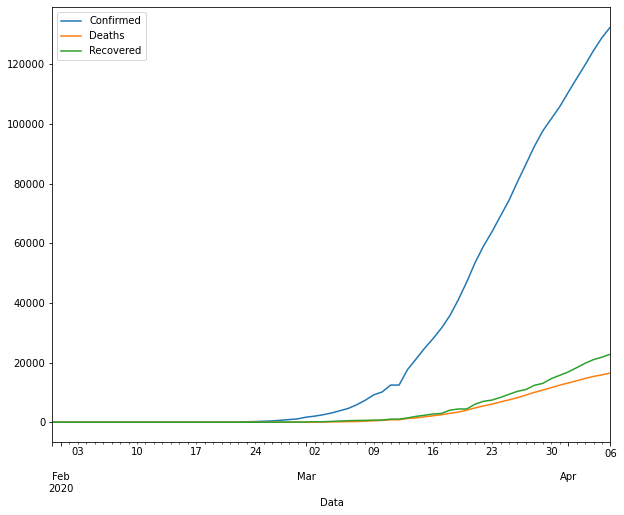

In [126]:
COVID_Data.pivot_table(index='Data', values=['Confirmed', 'Deaths', 'Recovered'], aggfunc='mean').plot(figsize=(10, 8))

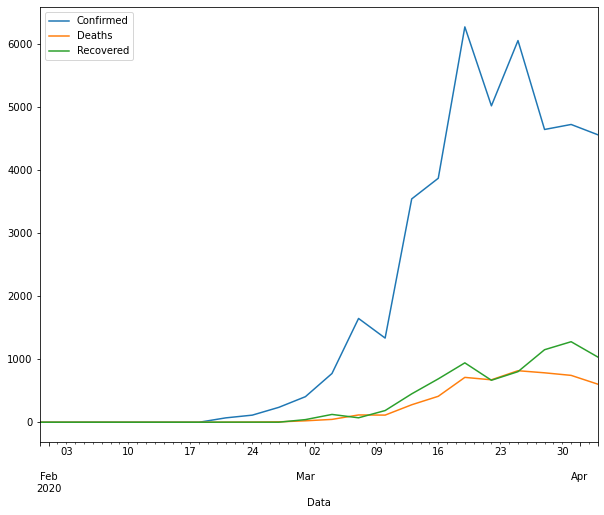

In [130]:
COVID_Data_3d.pivot_table(index='Data', values=['Confirmed', 'Deaths', 'Recovered']).plot(figsize=(10, 8))

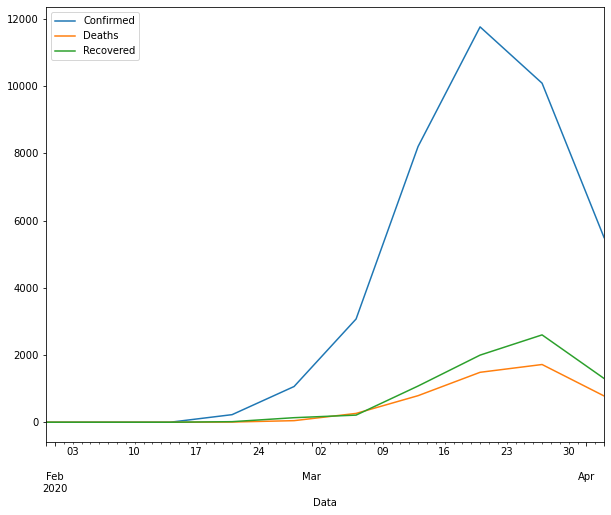

In [131]:
COVID_Data_w.pivot_table(index='Data', values=['Confirmed', 'Deaths', 'Recovered']).plot(figsize=(10, 8))

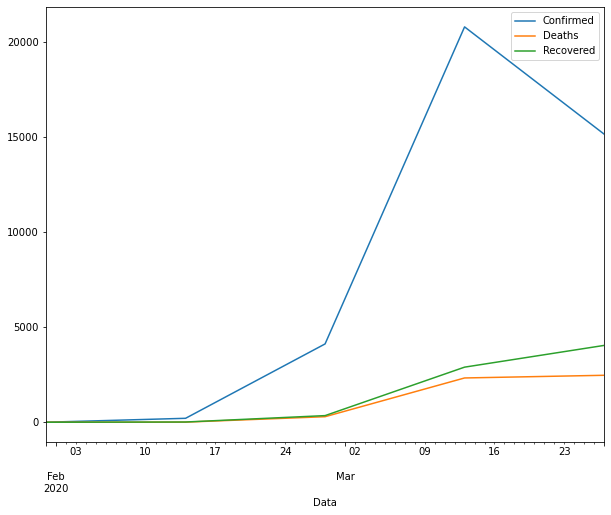

In [132]:
COVID_Data_2w.pivot_table(index='Data', values=['Confirmed', 'Deaths', 'Recovered']).plot(figsize=(10, 8))